<a href="https://colab.research.google.com/github/mrmendapara/Python-ML/blob/master/CaliforniaHousing_Polynomial_Regression_Manthan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import random

In [0]:
data = pd.read_csv("sample_data/california_housing_train.csv")

In [5]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0


In [6]:
target = data['median_house_value']
target = np.array(target)
target = target.reshape(1,len(target))
target.shape

(1, 17000)

In [7]:
feature = data.drop('median_house_value', axis=1).copy()
feature = np.array(feature)
feature.shape

(17000, 8)

In [17]:
p = np.random.randint(1,20,len(feature.T))
p = p.reshape(len(feature.T),1)
p.shape

(8, 1)

In [0]:
feature=feature/feature.max()
target=target/target.max()

In [0]:
def curve(m,x,c):
    return np.dot(m,(x.T)**p)+c
def error(m,x,c,y):
    return np.mean((curve(m,x,c)-y)**2)
def der_slope(m,x,c,y):
    return 2*np.mean((np.multiply((curve(m,x,c)-y),x.T**p)),axis=1)
def der_int(m,x,c,y):
    return 2*np.mean(curve(m,x,c)-y)

error: 0.0552799612021506
iteration : 999


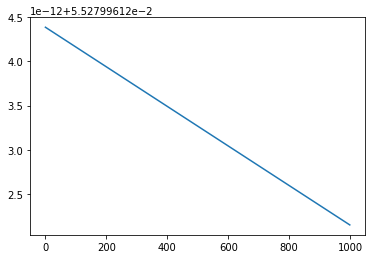

In [21]:
m = np.random.randn(1,len(feature.T))
c = random.random()
it=1000
lr=0.000000000001
cost=[]

for i in range(it):
    m=m-lr*der_slope(m,feature,c,target)
    c=c-lr*der_int(m,feature,c,target)
    cost.append(error(m,feature,c,target))
    clear_output(True)
    print('error:',error(m,feature,c,target))
    print('iteration :',i)
plt.plot(cost)
plt.show()